#Punto 1

In [ ]:
numero = 1.8

In [ ]:
signo = "0" if numero > 0 else "1"
mantissa = None
exponente = 127 

In [ ]:
#fuente: https://www.geeksforgeeks.org/python-program-to-convert-floating-to-binary/
def float_bin(number, places = 3):

	# split() separates whole number and decimal
	# part and stores it in two separate variables
	whole, dec = str(number).split(".")

	# Convert both whole number and decimal
	# part from string type to integer type
	whole = int(whole)
	dec = int (dec)

	# Convert the whole number part to it's
	# respective binary form and remove the
	# "0b" from it.
	res = bin(whole).lstrip("0b") + "."

	# Iterate the number of times, we want
	# the number of decimal places to be
	for x in range(places):

		# Multiply the decimal value by 2
		# and separate the whole number part
		# and decimal part
		whole, dec = str((decimal_converter(dec)) * 2).split(".")

		# Convert the decimal part
		# to integer again
		dec = int(dec)

		# Keep adding the integer parts
		# receive to the result variable
		res += whole

	return res

# Function converts the value passed as
# parameter to it's decimal representation
def decimal_converter(num):
	while num > 1:
		num /= 10
	return num

result = float_bin(numero, 23)

In [ ]:
mantissa = result.split(".")[1]
exponente = "{0:b}".format(exponente)

In [ ]:
representacion = signo + "0" + str(exponente) + mantissa #el cero añadido es producto de que internamente no se posicionaba correctamente con el codigo

In [ ]:
representacion

'00111111111001100110011001100110'

In [ ]:
"0011 1111 1110 0110 0110 0110 0110 0110"
3      f     e    6    6    6    6    6  #usando la tabla de bin to hex
"0x3fe66666"


 Hexadecimal equivalent of 00111111111001100110011001100110:  3FE6GU

#Punto 2


In [109]:
from IPython.display import display, Math
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import numpy as np
import math as mt

In [111]:
funcion = parse_expr("(x + 1) ** (1/3)")
x = parse_expr("x")

In [112]:
funcion

(x + 1)**(1/3)

In [144]:
valor = 4
valor_real = funcion.subs(x, valor).evalf()

a = [0, 1, 2]

errores = [] #absolutos
errores_r = [] #relativos
polinomios = []
iter = 0

suma = 0

for j in a:

  for i in range(11):

    derivada = sp.diff(funcion, x, i)
    derivada_evaluada = derivada.subs(x, a[j]).evalf()
    resta = (x - a[j]) ** i
    factorial = np.math.factorial(i)

    suma = suma + (derivada_evaluada * resta) / factorial

    iter = iter + 1
  
  polinomios.append(suma)



In [145]:
for i in range(len(polinomios)):

  error = np.abs(funcion.subs(x, valor).evalf() - polinomios[i].subs(x, valor).evalf())
  error_r = (funcion.subs(x, valor).evalf() - polinomios[i].subs(x, valor).evalf()) / funcion.subs(x, valor).evalf()
  errores.append(error)
  errores_r.append(error_r)

  #print(funcion.subs(x, valor).evalf() - )

In [146]:
errores

[9521.32821369817, 9520.09969042039, 9518.38982217974]

In [147]:
errores_r

[5568.10651764001, 5567.38807286880, 5566.38813585567]

In [148]:
taylor1 = polinomios[0].subs(x, valor).evalf()
taylor2 = polinomios[1].subs(x, valor).evalf()
taylor3 = polinomios[2].subs(x, valor).evalf()
valor_real = funcion.subs(x, valor).evalf()

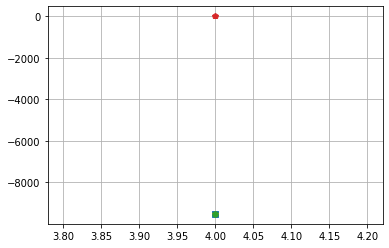

In [149]:
plt.grid()
plt.plot(valor,taylor1,marker="s")
plt.plot(valor,taylor2,marker="*")
plt.plot(valor,taylor3,marker="h")
plt.plot(valor,valor_real,marker="p")

Text(0.5, 0, 'valor de a')

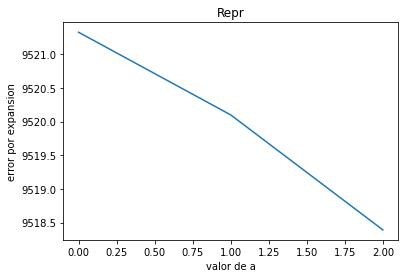

In [154]:
plt.plot(a, errores)
plt.title("Repr")
plt.ylabel("error por expansion")
plt.xlabel("valor de a")

Text(0.5, 0, 'valor de a')

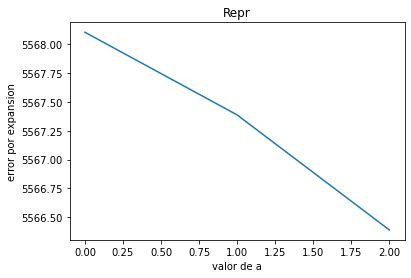

In [155]:
plt.plot(a, errores_r)
plt.title("Repr")
plt.ylabel("error por expansion")
plt.xlabel("valor de a")

In [156]:
error_min_por_a = min(errores)

In [157]:
error_min_por_a

9518.38982217974

In [158]:
errores

[9521.32821369817, 9520.09969042039, 9518.38982217974]

In [159]:
a_menor_error = a[2]

In [160]:
a_menor_error

2

Analítcamente se puede evidenciar que una serie hasta grado 10 no representan exactamente el valor real de f(4) debido a su gran margen de error, sin embargo, se puede evidenciar que para los mismos polinomios de mismo grado parece existir una relación de que entre mayor es el punto de expansión ligeramente el error es menor en el mismo grado para todos los polinomios, por tanto el mejor punto de expansión para grado 10 de esta serie es a = 2. 

Dato extra: para un orden 100 el valor es más aproximado



#Punto 3


In [166]:
f = parse_expr("x * ln(x) * (x + 1) ** (1/3)")
x = parse_expr("x")

In [173]:
h = [0.2, 0.5, 1.2]
valor = 4
errores_progresivas = []
errores_regresivas = []
errores_centradas = []
valor_real = f.diff(x, 1).subs(x, valor)

In [175]:
for i in range(len(h)):

  progresiva = (f.subs(x, valor + h[i]).evalf() - f.subs(x, valor).evalf()) / h[i]
  regresiva = (f.subs(x, valor).evalf() - f.subs(x, valor - h[i])) / h[i]
  centrada = (f.subs(x, valor + h[i]).evalf() - f.subs(x, valor - h[i]).evalf()) / 2 * h[i]

  errores_progresivas.append(np.abs(valor_real - progresiva))
  errores_regresivas.append(np.abs(valor_real - regresiva))
  errores_centradas.append(np.abs(valor_real - centrada))

In [176]:
errores_progresivas

[-19*5**(1/3)*log(4)/15 - 5**(1/3) + 4.80070583098724,
 -19*5**(1/3)*log(4)/15 - 5**(1/3) + 4.93038700236963,
 -19*5**(1/3)*log(4)/15 - 5**(1/3) + 5.22275241039093]

In [169]:
errores_regresivas

5**(1/3) + 19*5**(1/3)*log(4)/15

In [177]:
errores_centradas

[-0.188478655631166 + 5**(1/3) + 19*5**(1/3)*log(4)/15,
 -1.17709555816433 + 5**(1/3) + 19*5**(1/3)*log(4)/15,
 -19*5**(1/3)*log(4)/15 - 5**(1/3) + 6.75037831575245]

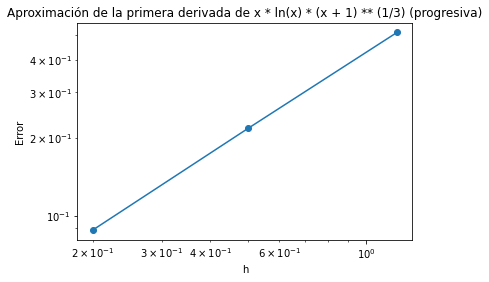

In [179]:
plt.plot(h, errores_progresivas, '-o')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('h')
plt.ylabel('Error')
plt.title('Aproximación de la primera derivada de x * ln(x) * (x + 1) ** (1/3) (progresiva)')
plt.show()

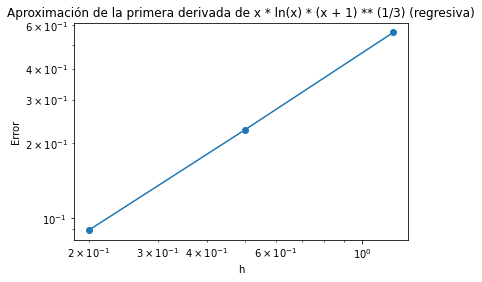

In [180]:
plt.plot(h, errores_regresivas, '-o')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('h')
plt.ylabel('Error')
plt.title('Aproximación de la primera derivada de x * ln(x) * (x + 1) ** (1/3) (regresiva)')
plt.show()

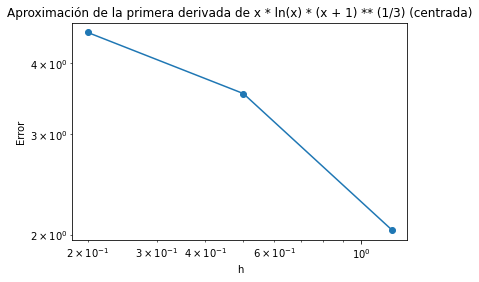

In [181]:
plt.plot(h, errores_centradas, '-o')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('h')
plt.ylabel('Error')
plt.title('Aproximación de la primera derivada de x * ln(x) * (x + 1) ** (1/3) (centrada)')
plt.show()

In [185]:
errores_derivadas = [min(errores_progresivas), min(errores_regresivas), min(errores_centradas)]

In [187]:
min(errores_derivadas)

-19*5**(1/3)*log(4)/15 - 5**(1/3) + 4.80070583098724

In [189]:
errores_derivadas

[-19*5**(1/3)*log(4)/15 - 5**(1/3) + 4.80070583098724,
 -4.62322695057108 + 5**(1/3) + 19*5**(1/3)*log(4)/15,
 -19*5**(1/3)*log(4)/15 - 5**(1/3) + 6.75037831575245]

A medida que el valor de h incrementa el error aumenta para la aproximación regresiva y progresiva, caso contrario para la centrada, esto puede ser debido a la naturaleza de la función. El menor error es obtenido con el valor de h = 0.2 para la diferenciacion progresiva con un valor que se evidencia en los prints anteriores